In [1]:
%matplotlib inline
import grale.lenses as lenses
import grale.cosmology as cosmology
import grale.plotutil as plotutil
import grale.feedback as feedback
import grale.images as images
from grale.constants import *
import matplotlib.pyplot as plt
import numpy as np

V = lambda x,y: np.array([x,y],dtype=float)
feedback.setDefaultFeedback("notebook")
plotutil.setDefaultAngularUnit(ANGLE_ARCSEC)

In [2]:
cosm = cosmology.Cosmology(0.71,0.27,0,0.73)
zd = 0.5
zs = 1.2
Dd = cosm.getAngularDiameterDistance(zd)
Ds = cosm.getAngularDiameterDistance(zs)
Dds = cosm.getAngularDiameterDistance(zd,zs)

In [3]:
nsie = lenses.NSIELens(Dd, { 
        "velocityDispersion": 1300000, 
        "ellipticity": 0.8, 
        "coreRadius": 1.5*ANGLE_ARCSEC})

In [4]:
lensInfo = { 
    "lens": nsie,
    "bottomleft": V(-100, -100)*ANGLE_ARCSEC,
    "topright": V(100, 100)*ANGLE_ARCSEC,
}
lensInfo2 = { 
    "lens": nsie,
    "bottomleft": V(-40, -40)*ANGLE_ARCSEC,
    "topright": V(40, 40)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}

In [5]:
plotutil.plotDensityInteractive(lensInfo, numX=100, numY=100);

Text(value='')

FloatProgress(value=0.0)

In [6]:
xCenter = 10
yCenter = 5
src = images.EllipticalSource(V(xCenter,yCenter)*ANGLE_ARCSEC, eccentricity = 0.6, 
                              halfAxis = 1.1*ANGLE_ARCSEC,angle = 30)

Text(value='')

FloatProgress(value=0.0)

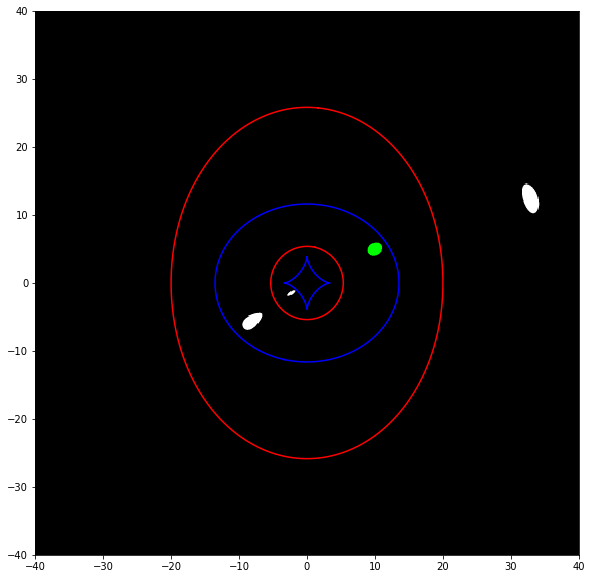

In [7]:
plt.figure(figsize=(10,10))
plotutil.plotImagePlane(lensInfo2, sources=[ src ]);

In [8]:
def createDiskDegeneracy(lens, lambdaValue, Ds, Dds, center, radius, endradius = None):
    Dd = lens.getLensDistance()
    critDens = lens.getCriticalDensity(Ds, Dds)
    if endradius is None:
        disk = lenses.MassDiskLens(Dd, { "Dd": Dd, "Ds": Ds, "Dds": Dds, "radius": radius })
    else:
        disk = lenses.MassDiskLensSmoothed( Dd, { "Dd": Dd, "Ds": Ds, "Dds": Dds, 
                                                  "radius": radius, "endradius": endradius })

    compLens = lenses.CompositeLens(Dd, [
        {
            "lens": lens,
            "factor": lambdaValue,
            "angle": 0,
            "x": 0,
            "y": 0
        },
        {
            "lens": disk,
            "factor": (1.0-lambdaValue),
            "angle": 0,
            "x": center[0],
            "y": center[1]
        }
    ])

    return compLens

In [9]:
l = 0.75
degen = createDiskDegeneracy(nsie, l, Ds, Dds, V(0,0)*ANGLE_ARCSEC, 75*ANGLE_ARCSEC, 90*ANGLE_ARCSEC)
degen2 = createDiskDegeneracy(degen, 1.0/l, Ds, Dds, V(xCenter,yCenter)*ANGLE_ARCSEC, 50*ANGLE_ARCSEC, 60*ANGLE_ARCSEC)
lensInfoDegen = { 
    "lens": degen2,
    "bottomleft": V(-100, -100)*ANGLE_ARCSEC,
    "topright": V(100, 100)*ANGLE_ARCSEC,
}
lensInfoDegen2 = { 
    "lens": degen2,
    "bottomleft": V(-40, -40)*ANGLE_ARCSEC,
    "topright": V(40, 40)*ANGLE_ARCSEC,
    "Ds": Ds,
    "Dds": Dds
}

In [10]:
plotutil.plotDensityInteractive(lensInfoDegen, numX=100, numY=100);

Text(value='')

FloatProgress(value=0.0)

In [11]:
src2 = images.EllipticalSource(V((xCenter*l-xCenter)/l+xCenter,(yCenter*l-yCenter)/l+yCenter)*ANGLE_ARCSEC, 
                               eccentricity = 0.6, halfAxis = 1.1*ANGLE_ARCSEC,angle = 30)

Text(value='')

Text(value='')

FloatProgress(value=0.0)

Original source position: [10.  5.]
Moved source position: [6.66666667 3.33333333]


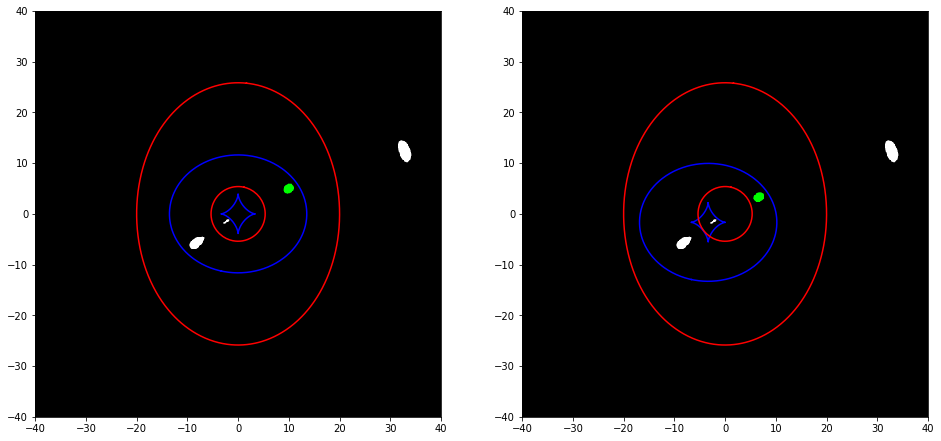

In [12]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plotutil.plotImagePlane(lensInfo2, sources=[ src ]);
plt.subplot(1,2,2)
plotutil.plotImagePlane(lensInfoDegen2, sources=[ src2 ]);
print("Original source position:", src.getAngularPosition()/ANGLE_ARCSEC)
print("Moved source position:", src2.getAngularPosition()/ANGLE_ARCSEC)